### Generate some statistics files

In [1]:
! pip install libsumo addict

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import analysis.stats_utils_v2 as stats_utils
from analysis.viz_utils_v2 import visualizer
import os
from tqdm import tqdm

# change here
exp_repo = "/scratch/henryliu_root/henryliu98/shared_data/safetest-nade"
mode="ITE_verify_map_0824_with_AV_new_ITE"
user = "haoyang"
experiment_record_repo = f"{exp_repo}/{mode}/raw_data"
export_stat_dir = f"{exp_repo}/{mode}/{user}/processed_data"

# # test code
# experiment_record_repo = "output/test/raw_data"
# export_stat_dir = "output/test/processed_data"
# export_stat_dir = "."

if not os.path.exists(export_stat_dir):
    os.system(f"mkdir -p {export_stat_dir}")
    os.system(f"chmod 755 {export_stat_dir}")

In [3]:
stats_utils.export_to_csv(experiment_record_repo, export_stat_dir)
os.system(f"chmod -R 775 {export_stat_dir}")

100%|██████████| 17788/17788 [00:29<00:00, 597.15it/s]

info_error:  0


0

In [4]:
awk_cmd = """awk -F "[_/]" '{print $35}'""" + " check.txt | sort | uniq -cd"
print("count", "exp_id")
os.system(awk_cmd)

count exp_id


0

### Analyze

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

/tmp/ipykernel_4179449/2290088659.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


#### Import statistics of each experiment

In [6]:
exp_stats_info = pd.read_csv(f"{export_stat_dir}/stats.tsv", sep='\t')
exp_stats_info.head()

,name,end_time,crash_veh_1,crash_veh_2,importance,maneuver_challenge,neg_veh,neg_time_diff,neg_reason,neg_info,route_length,bv_22_route_length,lane_id,collision_type,location_type,relative_heading,distance,end_reason
0,ITE_verify_map_0824_with_AV_new_ITE_109_1,1200.0,NaN,NaN,-0.000000,0,NaN,-1.0,NaN,NaN,64395.303580,2179.742406,NaN,NaN,NaN,None,-10.0,timeout
1,ITE_verify_map_0824_with_AV_new_ITE_109_2,1180.7,NaN,NaN,-0.004365,1,NaN,-1.0,NaN,NaN,52613.435419,3289.813229,NaN,NaN,NaN,None,-10.0,CAV_out_of_env
2,ITE_verify_map_0824_with_AV_new_ITE_109_3,1140.4,NaN,NaN,-0.034918,8,NaN,-1.0,NaN,NaN,48557.997654,3468.823310,NaN,NaN,NaN,None,-10.0,CAV_out_of_env
3,ITE_verify_map_0824_with_AV_new_ITE_109_4,1155.1,NaN,NaN,-0.000000,0,NaN,-1.0,NaN,NaN,52774.519768,1195.665213,NaN,NaN,NaN,None,-10.0,CAV_out_of_env
4,ITE_verify_map_0824_with_AV_new_ITE_109_5,1200.0,NaN,NaN,-0.030552,7,NaN,-1.0,NaN,NaN,70724.155498,3008.586842,NaN,NaN,NaN,None,-10.0,timeout


In [9]:
# exp_stats_info_old = pd.read_csv(f"{export_stat_dir}/stats-old.tsv", sep='\t')
# b = exp_stats_info_old[~exp_stats_info_old["neg_reason"].isna()]

# cnt = 0
# for name in a["name"]:
#     location = a[a["name"] == name]["location_type"].values[0]
#     collision_a = a[a["name"] == name]["collision_type"].values[0]
#     collision_b = b[b["name"] == name]["collision_type"].values[0]
#     if collision_a != collision_b and location == "intersection":
#         print(name, collision_a, collision_b)
#         cnt += 1
    
# print(cnt)

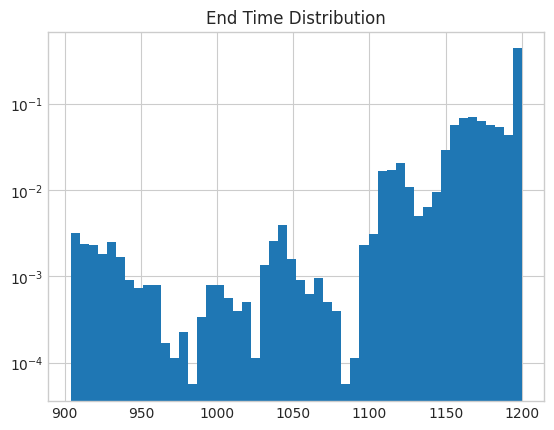

In [10]:
# draw the end time distribution
# exp_stats_info["end_time"].hist(bins=100)
num_experiments = len(exp_stats_info)
plt.hist(exp_stats_info["end_time"], weights=np.ones(num_experiments)/num_experiments, bins=50)
plt.yscale("log")
plt.title("End Time Distribution")
plt.savefig(f"{export_stat_dir}/end_time.png")

**Filter the experiments with time difference between negligence and collision larger than 3s**

In [11]:
warm_up_time = 900
estimated_end_time = warm_up_time + 300

has_collision = (exp_stats_info['end_reason'] == "collision") & (exp_stats_info['end_time'] >= warm_up_time)
collision_df = exp_stats_info[has_collision]

has_collision_in_warmup = (exp_stats_info['end_time'] <= warm_up_time)
warmup_collision_df = exp_stats_info[has_collision_in_warmup]

print("Collision numbers:", len(collision_df), "Warmup collisions:", len(warmup_collision_df)) # the number of collisions 

Collision numbers: 572 Warmup collisions: 0


**See the list of files with time difference between negligence and collision larger than 3s**

### See the collisions

In [12]:
collision_df.head()

,name,end_time,crash_veh_1,crash_veh_2,importance,maneuver_challenge,neg_veh,neg_time_diff,neg_reason,neg_info,route_length,bv_22_route_length,lane_id,collision_type,location_type,relative_heading,distance,end_reason
236,ITE_verify_map_0824_with_AV_new_ITE_341_1,917.6,BV_14.12,CAV,5.180999,6,BV_14.12,0.6,LeftFoll,highway_cutin,3524.364539,170.817777,EG_1_3_1_1,sideswipe,freeway_1,17.54320699966621,-0.637672,collision
251,ITE_verify_map_0824_with_AV_new_ITE_341_16,1135.7,CAV,BV_22.7,4.161173,25,BV_22.7,2.3,Lead,intersection_rearend,54105.149243,2291.005501,EG_17_1_1_0,rear_end,intersection,0.0,-0.031488,collision
253,ITE_verify_map_0824_with_AV_new_ITE_341_18,929.0,BV_8.40,CAV,5.028232,41,BV_8.40,0.6,LeftFoll,highway_cutin,5937.025302,126.156517,EG_1_3_1_1,sideswipe,freeway_1,19.82055274607069,-1.828255,collision
287,ITE_verify_map_0824_with_AV_new_ITE_490_15,1015.9,BV_14.15,CAV,7.721310,96,BV_14.15,0.5,RightFoll,intersection_cutin,24003.594789,1312.957218,EG_16_23_1_0,sideswipe,intersection,17.912566636357184,-0.751850,collision
290,ITE_verify_map_0824_with_AV_new_ITE_490_18,1043.9,CAV,BV_22.5,4.244100,6,BV_22.5,1.9,Lead,intersection_rearend,27050.687831,2090.765628,EG_17_1_1_0,rear_end,intersection,0.0,-0.300032,collision


In [17]:
all_maneuvers = exp_stats_info["maneuver_challenge"].sum()
all_time = (exp_stats_info["end_time"] - 900).sum()
all_routes = exp_stats_info["route_length"].sum()
cav_all_routes = exp_stats_info["cav_route_length"].sum()

mile_to_m = 1609.344
no_negligence_collision_related = collision_df['neg_time_diff'] < 0
power_importance_weight = np.power(10, - exp_stats_info['importance'])
collide_importance_weight = power_importance_weight[(power_importance_weight < 1) & has_collision]
importance_all = collide_importance_weight.sum()
num_experiments = len(exp_stats_info)
num_collisions = len(collision_df)
no_related_negligence_collision = collision_df[no_negligence_collision_related]

print(f"Number of experiments: {num_experiments}")
print(f"Number of collision: {num_collisions}")
print(f"Collisions with weight less than 1: {len(collide_importance_weight)}")
print(f"Importance summation: {importance_all}")
print(f"Max weight: {collide_importance_weight.max()}, Min weight: {collide_importance_weight.min()}")
print(f"raw collision rate: {num_collisions / num_experiments}")
print(f"adjusted collision rate (importance): {importance_all/num_experiments}")
print(f"Collision due to traffic light ignorance: {len(collision_df[collision_df['neg_reason'] == 'TFL'])}")
print(f"Overall maneuvers: {all_maneuvers}")

print(f"Collision without negligence: {len(no_related_negligence_collision)}")
print(f"Maximum time between collision and negligence: {collision_df['neg_time_diff'].max():.2f} s")

print()
print(f"Overall time: {all_time:.2f} s")
print(f"Maneuvers per second: {all_maneuvers / all_time}")
print(f"Overall route length: {all_routes:.2f} m")
print(f"m/s: {all_routes/all_time}")
print(f"Overall route length: {all_routes/mile_to_m} mile")
print(f"mile/s: {all_routes/mile_to_m/all_time} mile/s")
print(f"Crash per mile: {importance_all/all_routes*mile_to_m} crash/mile")
print(f"Crash per mile for CAV: {importance_all/cav_all_routes*mile_to_m} crash/mile")

995012280.1743522
54006634.35030592
Number of experiments: 17788
Number of collision: 572
Collisions with weight less than 1: 572
Importance summation: 0.02922421855987476
Max weight: 0.003123111119359364, Min weight: 1.8509770943505542e-17
raw collision rate: 0.032156510006746124
adjusted collision rate (importance): 1.6429176163635463e-06
Collision due to traffic light ignorance: 2
Overall maneuvers: 187625
Collision without negligence: 0
Maximum time between collision and negligence: 4.50 s

Overall time: 4845596.50 s
Maneuvers per second: 0.03872072303172581
Overall route length: 54006634.35 m
m/s: 11.145507957648952
Overall route length: 33558.16677497535 mile
mile/s: 0.006925497567735023 mile/s
Crash per mile: 8.708526528233226e-07 crash/mile


In [14]:
exp_stats_info.head()

,name,end_time,crash_veh_1,crash_veh_2,importance,maneuver_challenge,neg_veh,neg_time_diff,neg_reason,neg_info,route_length,bv_22_route_length,lane_id,collision_type,location_type,relative_heading,distance,end_reason
0,ITE_verify_map_0824_with_AV_new_ITE_109_1,1200.0,NaN,NaN,-0.000000,0,NaN,-1.0,NaN,NaN,64395.303580,2179.742406,NaN,NaN,NaN,None,-10.0,timeout
1,ITE_verify_map_0824_with_AV_new_ITE_109_2,1180.7,NaN,NaN,-0.004365,1,NaN,-1.0,NaN,NaN,52613.435419,3289.813229,NaN,NaN,NaN,None,-10.0,CAV_out_of_env
2,ITE_verify_map_0824_with_AV_new_ITE_109_3,1140.4,NaN,NaN,-0.034918,8,NaN,-1.0,NaN,NaN,48557.997654,3468.823310,NaN,NaN,NaN,None,-10.0,CAV_out_of_env
3,ITE_verify_map_0824_with_AV_new_ITE_109_4,1155.1,NaN,NaN,-0.000000,0,NaN,-1.0,NaN,NaN,52774.519768,1195.665213,NaN,NaN,NaN,None,-10.0,CAV_out_of_env
4,ITE_verify_map_0824_with_AV_new_ITE_109_5,1200.0,NaN,NaN,-0.030552,7,NaN,-1.0,NaN,NaN,70724.155498,3008.586842,NaN,NaN,NaN,None,-10.0,timeout


In [15]:
a = exp_stats_info[(exp_stats_info["importance"] <= 0) & (exp_stats_info["end_time"] < 1200)]
a

,name,end_time,crash_veh_1,crash_veh_2,importance,maneuver_challenge,neg_veh,neg_time_diff,neg_reason,neg_info,route_length,bv_22_route_length,lane_id,collision_type,location_type,relative_heading,distance,end_reason
1,ITE_verify_map_0824_with_AV_new_ITE_109_2,1180.7,NaN,NaN,-0.004365,1,NaN,-1.0,NaN,NaN,52613.435419,3289.813229,NaN,NaN,NaN,None,-10.0,CAV_out_of_env
2,ITE_verify_map_0824_with_AV_new_ITE_109_3,1140.4,NaN,NaN,-0.034918,8,NaN,-1.0,NaN,NaN,48557.997654,3468.823310,NaN,NaN,NaN,None,-10.0,CAV_out_of_env
3,ITE_verify_map_0824_with_AV_new_ITE_109_4,1155.1,NaN,NaN,-0.000000,0,NaN,-1.0,NaN,NaN,52774.519768,1195.665213,NaN,NaN,NaN,None,-10.0,CAV_out_of_env
5,ITE_verify_map_0824_with_AV_new_ITE_109_6,1173.2,NaN,NaN,-0.000000,0,NaN,-1.0,NaN,NaN,63029.692995,4012.014024,NaN,NaN,NaN,None,-10.0,CAV_out_of_env
7,ITE_verify_map_0824_with_AV_new_ITE_109_8,1171.2,NaN,NaN,-0.192050,44,NaN,-1.0,NaN,NaN,55942.538462,3916.032883,NaN,NaN,NaN,None,-10.0,CAV_out_of_env
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17779,ITE_verify_map_0824_with_AV_new_ITE_211_32,1152.1,NaN,NaN,-0.013094,3,NaN,-1.0,NaN,NaN,49523.532483,4135.629562,NaN,NaN,NaN,None,-10.0,CAV_out_of_env
17780,ITE_verify_map_0824_with_AV_new_ITE_211_33,1120.4,NaN,NaN,-0.000000,0,NaN,-1.0,NaN,NaN,45966.658908,2215.298015,NaN,NaN,NaN,None,-10.0,CAV_out_of_env
17781,ITE_verify_map_0824_with_AV_new_ITE_211_34,1171.8,NaN,NaN,-0.017459,4,NaN,-1.0,NaN,NaN,59299.498846,4990.889109,NaN,NaN,NaN,None,-10.0,CAV_out_of_env
17782,ITE_verify_map_0824_with_AV_new_ITE_211_35,1176.1,NaN,NaN,-0.034917,8,NaN,-1.0,NaN,NaN,58903.256738,3047.978628,NaN,NaN,NaN,None,-10.0,CAV_out_of_env


#### BV_22 Collision

In [16]:
is_veh_1_bv_22 = np.array(list(map(lambda x: x.startswith("BV_22"), collision_df["crash_veh_1"])))
is_veh_2_bv_22 = np.array(list(map(lambda x: x.startswith("BV_22"), collision_df["crash_veh_2"])))
has_bv_22 = is_veh_1_bv_22 | is_veh_2_bv_22
bv_22_collision_df = collision_df[has_bv_22]

total_bv_22_distance = exp_stats_info["bv_22_route_length"].sum()

num_bv_22_expr = np.sum(has_bv_22)
bv_22_collision_is_large_1 = bv_22_collision_df["importance"] < 0
power_bv_22_weight = np.power(10, -bv_22_collision_df["importance"])[~bv_22_collision_is_large_1]
bv_22_importance = np.sum(power_bv_22_weight)

print("Number of bv_22 collision:", num_bv_22_expr)
print("Total bv_22 distance:", total_bv_22_distance)
print("Number of bv_22 collision importance > 1:", np.sum(bv_22_collision_is_large_1))
print("Raw collision rate:", num_bv_22_expr / num_experiments)
print("Collision rate:", bv_22_importance / num_experiments)
print("Collision rate (weighted):", bv_22_importance / total_bv_22_distance * mile_to_m)

Number of bv_22 collision: 164
Total bv_22 distance: 54006634.35030592
Number of bv_22 collision importance > 1: 0
Raw collision rate: 0.009219698673262874
Collision rate: 2.539770631197886e-07
Collision rate (weighted): 1.346242787655411e-07


### Crash Distribution (with negligence)

In [19]:
exp_stats_info[(exp_stats_info["importance"] <= 0) & (exp_stats_info["end_reason"] == "collision") & (exp_stats_info["neg_time_diff"]  > 0)]

,name,end_time,crash_veh_1,crash_veh_2,importance,maneuver_challenge,neg_veh,neg_time_diff,neg_reason,neg_info,route_length,bv_22_route_length,lane_id,collision_type,location_type,relative_heading,distance,end_reason


### Load file that show the relationship between lane and experiment

**See the collision number in each experiment**

In [20]:
exp_stats_info.head()

,name,end_time,crash_veh_1,crash_veh_2,importance,maneuver_challenge,neg_veh,neg_time_diff,neg_reason,neg_info,route_length,bv_22_route_length,lane_id,collision_type,location_type,relative_heading,distance,end_reason
0,ITE_verify_map_0824_with_AV_new_ITE_109_1,1200.0,NaN,NaN,-0.000000,0,NaN,-1.0,NaN,NaN,64395.303580,2179.742406,NaN,NaN,NaN,None,-10.0,timeout
1,ITE_verify_map_0824_with_AV_new_ITE_109_2,1180.7,NaN,NaN,-0.004365,1,NaN,-1.0,NaN,NaN,52613.435419,3289.813229,NaN,NaN,NaN,None,-10.0,CAV_out_of_env
2,ITE_verify_map_0824_with_AV_new_ITE_109_3,1140.4,NaN,NaN,-0.034918,8,NaN,-1.0,NaN,NaN,48557.997654,3468.823310,NaN,NaN,NaN,None,-10.0,CAV_out_of_env
3,ITE_verify_map_0824_with_AV_new_ITE_109_4,1155.1,NaN,NaN,-0.000000,0,NaN,-1.0,NaN,NaN,52774.519768,1195.665213,NaN,NaN,NaN,None,-10.0,CAV_out_of_env
4,ITE_verify_map_0824_with_AV_new_ITE_109_5,1200.0,NaN,NaN,-0.030552,7,NaN,-1.0,NaN,NaN,70724.155498,3008.586842,NaN,NaN,NaN,None,-10.0,timeout


In [21]:
# collision: negligence-caused 和 no negligence caused (SUMO)
# 每个种类做collision node的分布
neg_caused_collision = exp_stats_info[exp_stats_info["neg_time_diff"] >= 0 & has_collision] # weight < 1 collisions
no_neg_realated_collision = exp_stats_info[(exp_stats_info["neg_time_diff"] < 0) & has_collision]
print(len(neg_caused_collision), len(no_neg_realated_collision))

572 0


Negligence caused distribution

In [22]:
neg_caused_collision["lane_id"].value_counts()

EG_1_3_1_1        236
EG_9_1_1_0         85
EG_17_1_1_0        62
EG_14_2_1_0        31
EG_16_23_1_0       23
:NODE_17_1_0       20
EG_34_1_24_1       19
EG_4_1_1_0         14
:nd_34_1_6_0_1     13
EG_10_1_1_0         8
:NODE_18_2_0        6
EG_20_1_11_0        5
:NODE_13_0_0        5
:NODE_5_1_1         4
EG_16_23_1_1        4
:nd_15_1_2_0_0      3
EG_21_1_5_0         3
:NODE_20_0_0        3
EG_34_1_3_1         3
:NODE_14_1_0        3
EG_1_3_1_0          2
:NODE_22_1_0        2
:NODE_5_1_0         2
:NODE_18_15_0       2
EG_16_45_1_0        2
:nd_34_1_6_1_0      1
EG_15_1_1_0         1
:NODE_19_3_0        1
:NODE_17_2_0        1
EG_13_1_1_0         1
:NODE_17_12_0       1
:NODE_18_8_0        1
:NODE_7_0_1         1
gneE0_0             1
EG_34_1_24_0        1
:NODE_26_1_0        1
:nd_15_1_3_0_0      1
Name: lane_id, dtype: int64

No negligence caused distribution

In [23]:
print(no_neg_realated_collision["lane_id"].value_counts())
print(len(no_neg_realated_collision))

Series([], Name: lane_id, dtype: int64)
0


### Crash Distribution (with negligence)

In [24]:
neg_caused_collision.head()

,name,end_time,crash_veh_1,crash_veh_2,importance,maneuver_challenge,neg_veh,neg_time_diff,neg_reason,neg_info,route_length,bv_22_route_length,lane_id,collision_type,location_type,relative_heading,distance,end_reason
236,ITE_verify_map_0824_with_AV_new_ITE_341_1,917.6,BV_14.12,CAV,5.180999,6,BV_14.12,0.6,LeftFoll,highway_cutin,3524.364539,170.817777,EG_1_3_1_1,sideswipe,freeway_1,17.54320699966621,-0.637672,collision
251,ITE_verify_map_0824_with_AV_new_ITE_341_16,1135.7,CAV,BV_22.7,4.161173,25,BV_22.7,2.3,Lead,intersection_rearend,54105.149243,2291.005501,EG_17_1_1_0,rear_end,intersection,0.0,-0.031488,collision
253,ITE_verify_map_0824_with_AV_new_ITE_341_18,929.0,BV_8.40,CAV,5.028232,41,BV_8.40,0.6,LeftFoll,highway_cutin,5937.025302,126.156517,EG_1_3_1_1,sideswipe,freeway_1,19.82055274607069,-1.828255,collision
287,ITE_verify_map_0824_with_AV_new_ITE_490_15,1015.9,BV_14.15,CAV,7.721310,96,BV_14.15,0.5,RightFoll,intersection_cutin,24003.594789,1312.957218,EG_16_23_1_0,sideswipe,intersection,17.912566636357184,-0.751850,collision
290,ITE_verify_map_0824_with_AV_new_ITE_490_18,1043.9,CAV,BV_22.5,4.244100,6,BV_22.5,1.9,Lead,intersection_rearend,27050.687831,2090.765628,EG_17_1_1_0,rear_end,intersection,0.0,-0.300032,collision


In [25]:
def crash_distribution(neg_caused_collision, feat_name):
    crash_type_dist = neg_caused_collision.groupby(["location", feat_name], as_index=False).agg(
        {
            "name": "count",
            "exp_importance": "sum"
        }
    )

    crash_type_dist["collision_rate"] = crash_type_dist["name"] / num_experiments
    crash_type_dist["importance_rate"] = crash_type_dist["exp_importance"] / num_experiments

    crash_type_dist.rename(columns={"name": "count"}, inplace=True)
    return crash_type_dist

In [26]:
neg_caused_collision = neg_caused_collision.copy()
neg_caused_collision["exp_importance"] = np.power(10, -neg_caused_collision["importance"])

# ! should be commmented later
neg_caused_collision["exp_importance"][neg_caused_collision["exp_importance"] >= 1] = 0

get_type_func = lambda x: x.split("_")[0] if x is not np.nan else "None"
neg_caused_collision["location"] = list(map(get_type_func, neg_caused_collision["location_type"]))
neg_caused_collision["collision"] = list(map(get_type_func, neg_caused_collision["collision_type"]))


crash_type_dist = crash_distribution(neg_caused_collision, "collision")
crash_type_dist

/tmp/ipykernel_453045/1315232982.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg_caused_collision["exp_importance"][neg_caused_collision["exp_importance"] >= 1] = 0


,location,collision,count,exp_importance,collision_rate,importance_rate
0,freeway,angle,17,0.000168,0.000956,9.444928e-09
1,freeway,rear,1,0.000010,0.000056,5.708988e-10
2,freeway,sideswipe,221,0.001939,0.012424,1.090062e-07
3,intersection,angle,26,0.008244,0.001462,4.634724e-07
4,intersection,head,1,0.000018,0.000056,1.025373e-09
5,intersection,rear,130,0.007344,0.007308,4.128703e-07
6,intersection,sideswipe,7,0.009749,0.000394,5.480742e-07
7,roundabout,angle,38,0.000998,0.002136,5.608383e-08
8,roundabout,rear,121,0.000656,0.006802,3.685695e-08
9,roundabout,sideswipe,10,0.000098,0.000562,5.512499e-09


location
freeway         0.072446
intersection    0.867629
roundabout      0.059926
Name: exp_importance, dtype: float64


/tmp/ipykernel_453045/772777619.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  location_distribution = neg_caused_collision.groupby("location").sum()/importance_all


Text(0.5, 1.0, 'ground truth')

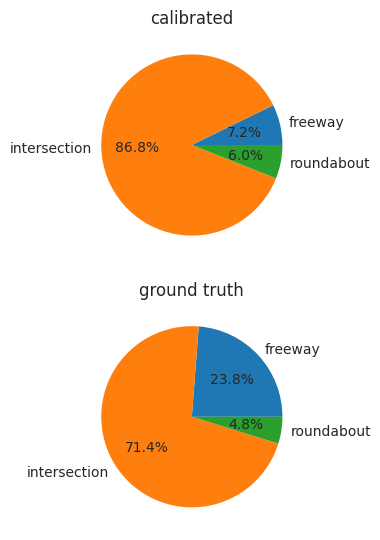

In [27]:
location_distribution = neg_caused_collision.groupby("location").sum()/importance_all
proportion = location_distribution["exp_importance"]
print(proportion)

plt.figure(figsize=(20, 10))
plt.subplot(3, 1, 1)
plt.pie(proportion, labels=proportion.index, autopct='%1.1f%%')
# plt.bar(proportion.index, values=proportion)
plt.title("calibrated")
plt.subplot(3, 1, 2)
true_dist = np.array([1525, 4581, 307]) / (1525 + 4581 + 307)
plt.pie(true_dist, labels=proportion.index, autopct='%1.1f%%')
# plt.bar(proportion.index, values=true_dist)
plt.title("ground truth")

In [28]:
def pie_chart_plot(df, mode, feat_name):
    mark = df["location"] == mode
    labels = df[mark][feat_name]
    values = df[mark]["importance_rate"]
    plt.pie(values, labels=labels, autopct='%1.1f%%')
    # plt.bar(labels, values)
    plt.title(f'{mode}')
    # plt.legend(labels)

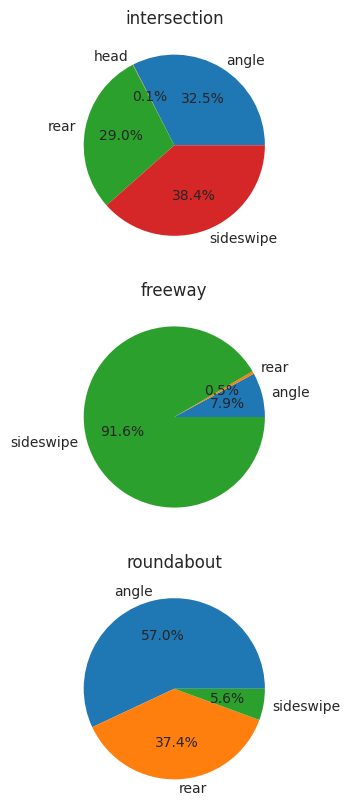

In [29]:
plt.figure(figsize=(30, 10))
plt.subplot(3, 1, 1)
pie_chart_plot(crash_type_dist, "intersection", "collision")
plt.subplot(3, 1, 2)
pie_chart_plot(crash_type_dist, "freeway", "collision")
plt.subplot(3, 1, 3)
pie_chart_plot(crash_type_dist, "roundabout", "collision")
plt.savefig(f"{export_stat_dir}/pie_chart.png")

In [30]:
len(neg_caused_collision)

572

#### Negligence reason

In [31]:
neg_reason_crash_dist = crash_distribution(neg_caused_collision, "neg_reason")
neg_reason_crash_dist

,location,neg_reason,count,exp_importance,collision_rate,importance_rate
0,freeway,LeftFoll,237,0.002101,0.013324,1.181123e-07
1,freeway,RightFoll,2,0.000016,0.000112,9.097865e-10
2,intersection,Lead,151,0.007458,0.008489,4.192946e-07
3,intersection,LeftFoll,3,0.004147,0.000169,2.331088e-07
4,intersection,RightFoll,8,0.011064,0.000450,6.219823e-07
5,intersection,TFL,2,0.002687,0.000112,1.510566e-07
6,roundabout,Lead,140,0.001270,0.007870,7.137573e-08
7,roundabout,LeftFoll,26,0.000463,0.001462,2.601036e-08
8,roundabout,RightFoll,3,0.000019,0.000169,1.067187e-09


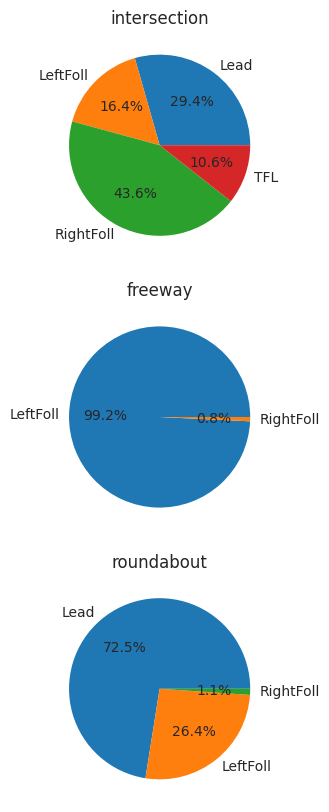

In [32]:
plt.figure(figsize=(30, 10))
plt.subplot(3, 1, 1)
pie_chart_plot(neg_reason_crash_dist, "intersection", "neg_reason")
plt.subplot(3, 1, 2)
pie_chart_plot(neg_reason_crash_dist, "freeway", "neg_reason")
plt.subplot(3, 1, 3)
pie_chart_plot(neg_reason_crash_dist, "roundabout", "neg_reason")
plt.savefig(f"{export_stat_dir}/neg_reason_pie_chart.png")

#### BV 22 Negligence Caused

In [33]:
is_veh_1_bv_22 = np.array(list(map(lambda x: x.startswith("BV_22"), neg_caused_collision["crash_veh_1"])))
is_veh_2_bv_22 = np.array(list(map(lambda x: x.startswith("BV_22"), neg_caused_collision["crash_veh_2"])))
has_bv_22 = is_veh_1_bv_22 | is_veh_2_bv_22
bv_22_neg_caused_collision = neg_caused_collision[has_bv_22]



bv_22_crash_type_dist = crash_distribution(bv_22_neg_caused_collision, "collision")
bv_22_crash_type_dist

,location,collision,count,exp_importance,collision_rate,importance_rate
0,freeway,sideswipe,26,0.000274,0.001462,1.539427e-08
1,intersection,rear,63,0.003672,0.003542,2.064235e-07
2,roundabout,angle,3,0.000086,0.000169,4.851783e-09
3,roundabout,rear,72,0.000486,0.004048,2.730750e-08


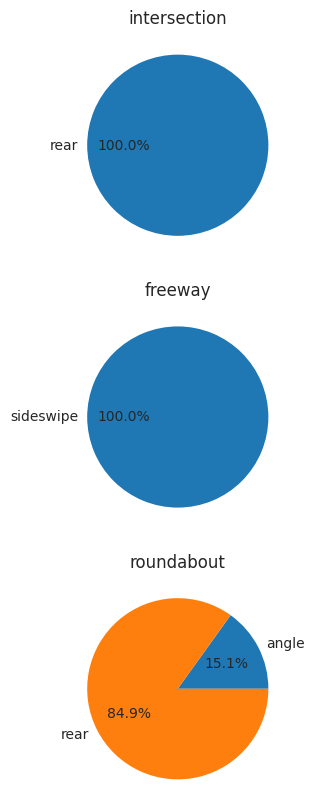

In [34]:
plt.figure(figsize=(30, 10))
plt.subplot(3, 1, 1)
pie_chart_plot(bv_22_crash_type_dist, "intersection", "collision")
plt.subplot(3, 1, 2)
pie_chart_plot(bv_22_crash_type_dist, "freeway", "collision")
plt.subplot(3, 1, 3)
pie_chart_plot(bv_22_crash_type_dist, "roundabout", "collision")
plt.savefig(f"{export_stat_dir}/bv_22_pie_chart.png")

##### EG happened collision intersection&angle

In [35]:
eg_collision = list(neg_caused_collision["lane_id"])
eg_collision_angle_df = neg_caused_collision[((neg_caused_collision["collision"] == "angle") | (neg_caused_collision["collision"] == "sideswipe")) & (neg_caused_collision["location"] == "freeway")]
# print(neg_caused_collision["relative_heading"])
# print(len(neg_caused_collision["relative_heading"]))

heading_float_list = [float(heading) for heading in eg_collision_angle_df["relative_heading"] if heading != 'None']
heading_float_list = np.array(heading_float_list)
print(len(heading_float_list))

238


In [36]:
eg_collision_angle_df = eg_collision_angle_df.sort_values(by="relative_heading")
eg_collision_angle_df["exp_cum"] = eg_collision_angle_df["exp_importance"].cumsum() / eg_collision_angle_df["exp_importance"].sum()
eg_collision_angle_df[eg_collision_angle_df["exp_cum"] < 28.08/(28.08+2.52)]

,name,end_time,crash_veh_1,crash_veh_2,importance,maneuver_challenge,neg_veh,neg_time_diff,neg_reason,neg_info,...,lane_id,collision_type,location_type,relative_heading,distance,end_reason,exp_importance,location,collision,exp_cum
13049,ITE_verify_map_0824_with_AV_new_ITE_57_20,909.0,BV_22.7,CAV,5.119892,20,BV_22.7,0.6,LeftFoll,highway_cutin,...,EG_1_3_1_1,sideswipe,freeway_1,16.287456093244145,-2.763596,collision,0.000008,freeway,sideswipe,0.003601
11387,ITE_verify_map_0824_with_AV_new_ITE_371_2,913.2,BV_17.39,CAV,5.176634,7,BV_17.39,0.6,LeftFoll,highway_cutin,...,EG_1_3_1_1,sideswipe,freeway_1,16.350604108773837,-2.632843,collision,0.000007,freeway,sideswipe,0.006761
16190,ITE_verify_map_0824_with_AV_new_ITE_85_6,921.5,BV_8.43,CAV,5.194094,3,BV_8.43,0.6,LeftFoll,highway_cutin,...,EG_1_3_1_1,sideswipe,freeway_1,16.381385450508617,-0.979817,collision,0.000006,freeway,sideswipe,0.009797
13616,ITE_verify_map_0824_with_AV_new_ITE_36_22,914.0,BV_14.10,CAV,5.006408,46,BV_14.10,0.6,LeftFoll,highway_cutin,...,EG_1_3_1_1,sideswipe,freeway_1,16.405535398322286,-2.730071,collision,0.000010,freeway,sideswipe,0.014473
12548,ITE_verify_map_0824_with_AV_new_ITE_425_37,927.2,BV_8.51,CAV,5.128622,18,BV_8.51,0.6,LeftFoll,highway_cutin,...,EG_1_3_1_1,sideswipe,freeway_1,16.545385010008943,-2.695989,collision,0.000007,freeway,sideswipe,0.018003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4017,ITE_verify_map_0824_with_AV_new_ITE_480_5,938.3,BV_17.44,CAV,4.871100,77,BV_17.44,0.6,LeftFoll,highway_cutin,...,EG_1_3_1_1,sideswipe,freeway_1,19.786021348591532,-0.347554,collision,0.000013,freeway,sideswipe,0.901265
1336,ITE_verify_map_0824_with_AV_new_ITE_32_31,919.1,BV_17.49,CAV,5.036962,39,BV_17.49,0.6,LeftFoll,highway_cutin,...,EG_1_3_1_1,sideswipe,freeway_1,19.795343242833837,-1.671586,collision,0.000009,freeway,sideswipe,0.905624
253,ITE_verify_map_0824_with_AV_new_ITE_341_18,929.0,BV_8.40,CAV,5.028232,41,BV_8.40,0.6,LeftFoll,highway_cutin,...,EG_1_3_1_1,sideswipe,freeway_1,19.82055274607069,-1.828255,collision,0.000009,freeway,sideswipe,0.910071
7685,ITE_verify_map_0824_with_AV_new_ITE_445_35,906.7,BV_8.50,CAV,5.084974,28,BV_8.50,0.6,LeftFoll,highway_cutin,...,EG_1_3_1_1,sideswipe,freeway_1,19.827418379419214,-2.066017,collision,0.000008,freeway,sideswipe,0.913974


0.07142857142857142


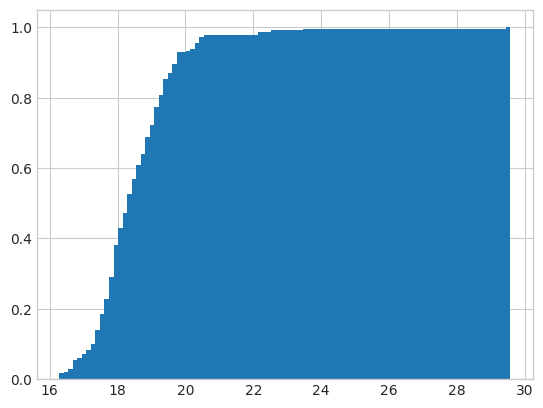

In [37]:
# # draw the histogram of the relative_heading of the collision in each location in neg_caused_collision
# grouped_neg_collision = neg_caused_collision["relative_heading"].groupby(neg_caused_collision["location"])
# for name, group_data in grouped_neg_collision:
#     plt.figure()
#     plt.hist(group_data, bins=50)
#     # plt.title(f"Collision Relative Heading Distribution in {name}")
# heading_flaot_list = np.clip(heading_flaot_list, 0, 30)
plt.figure()
plt.hist(heading_float_list, bins=100, density=True, cumulative=True)

print(np.sum(heading_float_list>20)/len(heading_float_list))

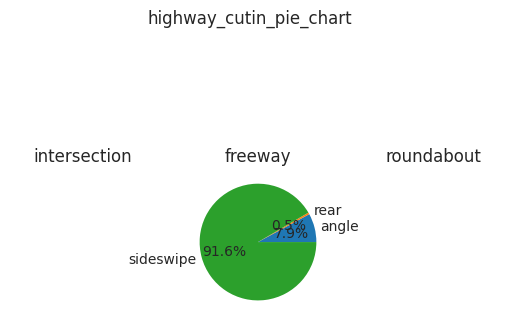

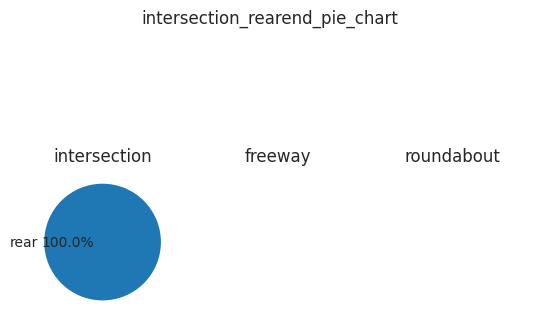

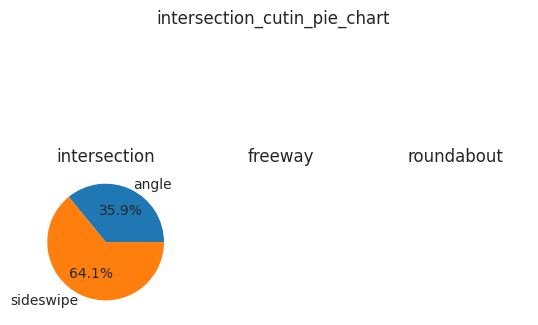

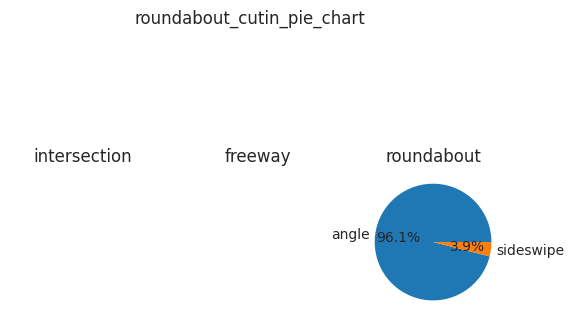

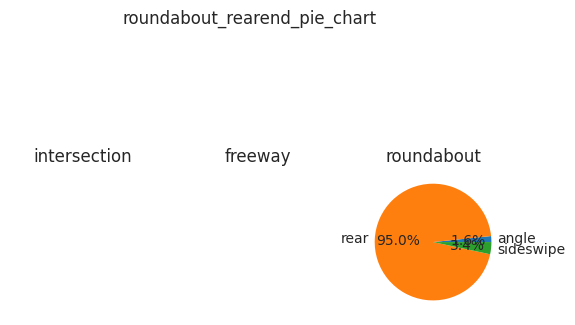

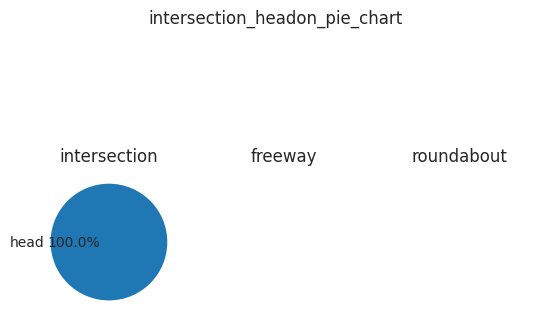

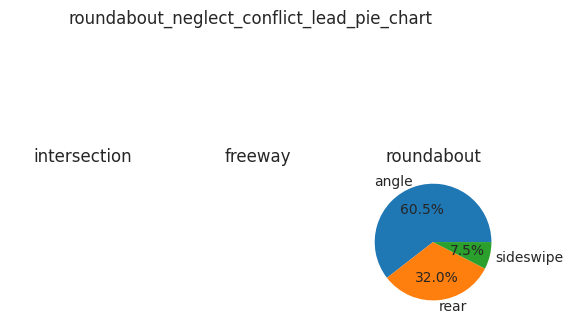

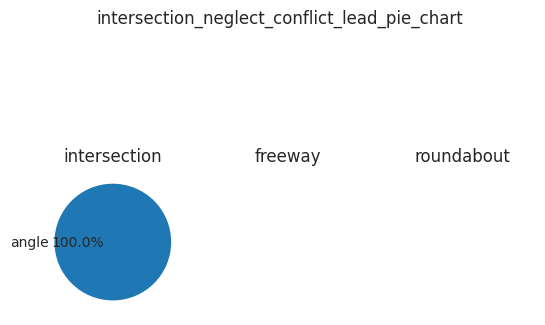

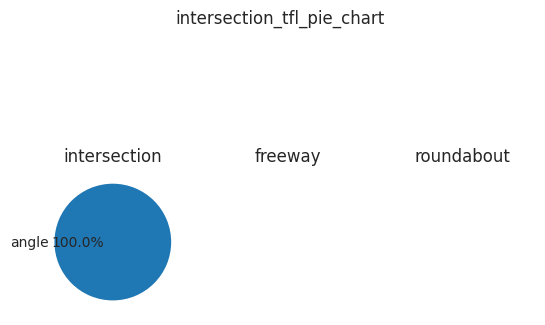

In [38]:
neg_uniq_infos = neg_caused_collision["neg_info"].unique()

neg_info_crash_dist = {}
for info in neg_uniq_infos:
    df = neg_caused_collision[neg_caused_collision["neg_info"] == info].copy()
    
    crash_type_dist = crash_distribution(df, "collision")
    neg_info_crash_dist[info] = crash_type_dist
    plt.figure()
    plt.subplot(1, 3, 1)
    pie_chart_plot(crash_type_dist, "intersection", "collision")
    plt.subplot(1, 3, 2)
    pie_chart_plot(crash_type_dist, "freeway", "collision")
    plt.subplot(1, 3, 3)
    pie_chart_plot(crash_type_dist, "roundabout", "collision")
    plt.suptitle(f"{info}_pie_chart")
    plt.savefig(f"{export_stat_dir}/{info}_pie_chart.png")

In [40]:
from IPython.display import display
for info, crash_dist in neg_info_crash_dist.items():
    print(info)
    display(crash_dist)

highway_cutin


,location,collision,count,exp_importance,collision_rate,importance_rate
0,freeway,angle,17,0.000168,0.000956,9.444928e-09
1,freeway,rear,1,0.000010,0.000056,5.708988e-10
2,freeway,sideswipe,221,0.001939,0.012424,1.090062e-07


intersection_rearend


,location,collision,count,exp_importance,collision_rate,importance_rate
0,intersection,rear,130,0.007344,0.007308,4.128703e-07


intersection_cutin


,location,collision,count,exp_importance,collision_rate,importance_rate
0,intersection,angle,4,0.005461,0.000225,3.070169e-07
1,intersection,sideswipe,7,0.009749,0.000394,5.480742e-07


roundabout_cutin


,location,collision,count,exp_importance,collision_rate,importance_rate
0,roundabout,angle,27,0.000463,0.001518,2.601037e-08
1,roundabout,sideswipe,2,0.000019,0.000112,1.067178e-09


roundabout_rearend


,location,collision,count,exp_importance,collision_rate,importance_rate
0,roundabout,angle,3,0.000007,0.000169,3.663897e-10
1,roundabout,rear,117,0.000376,0.006577,2.115328e-08
2,roundabout,sideswipe,5,0.000013,0.000281,7.485967e-10


intersection_headon


,location,collision,count,exp_importance,collision_rate,importance_rate
0,intersection,head,1,0.000018,0.000056,1.025373e-09


roundabout_neglect_conflict_lead


,location,collision,count,exp_importance,collision_rate,importance_rate
0,roundabout,angle,8,0.000528,0.000450,2.970707e-08
1,roundabout,rear,4,0.000279,0.000225,1.570367e-08
2,roundabout,sideswipe,3,0.000066,0.000169,3.696724e-09


intersection_neglect_conflict_lead


,location,collision,count,exp_importance,collision_rate,importance_rate
0,intersection,angle,21,0.000114,0.001181,6.424317e-09


intersection_tfl


,location,collision,count,exp_importance,collision_rate,importance_rate
0,intersection,angle,1,0.002669,0.000056,1.500312e-07


In [41]:
! pip install gurobipy
col_names = ["ia", "ih", "ir", "is", "ra", "rr", "rs", "fr", "fs", "fa"]

row_names = [
    "intersection_cutin", 
    "intersection_neglect_conflict_lead", 
    "intersection_rearend", 
    "intersection_tfl",
    "intersection_headon",
    "roundabout_cutin",
    "roundabout_neglect_conflict_lead",
    "roundabout_rearend",
    "highway_cutin",
    "highway_rearend"
]

translate_col = {col: i for i, col in enumerate(col_names)}
translate_row = {row: i for i, row in enumerate(row_names)}

A = np.zeros((len(translate_row), len(translate_col))).astype(int)
for row_mark in neg_info_crash_dist.keys():
    df = neg_info_crash_dist[row_mark]
    important_values = df["importance_rate"]
    col_marks = np.array(list(map(lambda x: x[1][0][0]+x[1][1][0], df.iterrows())))
    for col_mark, v in zip(col_marks, important_values):
        if col_mark in translate_col:
            A[translate_row[row_mark], translate_col[col_mark]] = v * 1e9
A = A.T

Defaulting to user installation because normal site-packages is not writeable


In [42]:
A[:4, 5:] = 0
A[4:, :5] = 0
A[:7, 8:] = 0
A[7:, :8] = 0

In [43]:
A

array([[307,   6,   0, 150,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0,   0, 412,   0,   0,   0,   0,   0,   0,   0],
       [548,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  26,  29,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  15,  21,   0,   0],
       [  0,   0,   0,   0,   0,   1,   3,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 109,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   9,   0]])

#### Calibration

In [44]:
import itertools
import numpy as np
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import gurobipy as gp
from gurobipy import GRB

class StopExecution(Exception):
    def _render_traceback_(self):
        pass

# basic parameters
n = A.shape[1]
m = A.shape[0]
b = np.array([1839, 285, 1648, 808, 169, 53, 85, 1058, 428, 38])
all_miles = all_routes / mile_to_m
b = b / b.sum() * all_miles / num_experiments * 3e3

# Gurobi model
model = gp.Model()
model.reset()

# variable
x = model.addVars(range(n), lb=0.1)
t = model.addVars(range(m), lb=0)
upper = model.addVar(lb=1)
lower = model.addVar(lb=0)

# optimization goal
model.setObjective(sum(t[i] for i in range(m)) + 20 * upper + 200 * (1-lower), GRB.MINIMIZE)

# constraints
model.addConstrs(sum(x[j] * A[i, j] for j in range(n)) - b[i] <= t[i] for i in range(m))
model.addConstrs(sum(x[j] * A[i, j] for j in range(n)) - b[i] >= -t[i] for i in range(m))
model.addConstrs(x[i] <= upper for i in range(n))
model.addConstrs(x[i] >= lower for i in range(n))
model.update()

# solve the model
model.optimize()
if model.status != GRB.Status.OPTIMAL:
    print("***** Gurobi solve status:", model.status)
    print("***** This is a problem. Model does not have an optimal solution")
    raise StopExecution
print(" ")
print("***** Solution:")
# x_solved = np.array([x[i].X for i in range(n)]).reshape(-1, 1)
# t_solved = np.array([t[i].X for i in range(m)]).reshape(-1, 1)
x_solved = [x[i].X for i in range(n)]
t_solved = [t[i].X for i in range(m)]
x_mark_solved = list(zip(translate_row, x_solved))
t_mark_solved = list(zip(translate_col, t_solved))
print("x =",  *x_mark_solved, sep="\n")
print("t =",  *t_mark_solved, sep="\n")
print("x upper bound = ", upper.X)
print("x upper bound = ", lower.X)
print("b =", b)

Restricted license - for non-production use only - expires 2024-10-28
Discarded solution information
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (linux64)

CPU model: Intel(R) Xeon(R) Gold 6154 CPU @ 3.00GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 36 physical cores, 36 logical processors, using up to 32 threads

Optimize a model with 40 rows, 22 columns and 88 nonzeros
Model fingerprint: 0x92b8dec3
Coefficient statistics:
  Matrix range     [1e+00, 5e+02]
  Objective range  [1e+00, 2e+02]
  Bounds range     [1e-01, 1e+00]
  RHS range        [6e+02, 3e+04]
Presolve removed 3 rows and 2 columns
Presolve time: 0.11s
Presolved: 37 rows, 20 columns, 84 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -2.0000000e+32   1.000000e+31   2.000000e+02      0s
      17    2.1269724e+04   0.000000e+00   0.000000e+00      0s

Solved in 17 iterations and 0.17 seconds (0.00 work units)
Optimal objective  2.126972446e+04
 
***** Solution:
x =
('inte

### Quick check

In [45]:
quick_check_exp = no_neg_realated_collision.groupby("lane_id").agg({
    "name": ["nunique", "first"],
    # "veh_1_route": set,
    # "veh_2_route": set,
    # "experiment": "first"
})
# quick_check_exp["veh_route"] = quick_check_exp[["veh_1_route", "veh_2_route"]].apply(lambda x: set(x[0]) | set(x[1]), axis=1)
quick_check_exp.sort_values(by=("name", "nunique"), ascending=False)

Empty DataFrame
Columns: [(name, nunique), (name, first)]
Index: []

0.003123111119359364 1.8509770943505542e-17


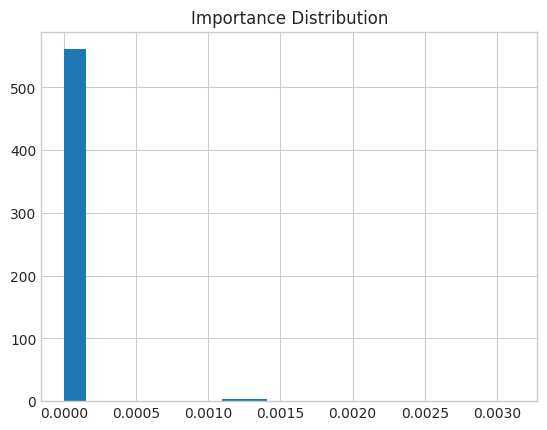

In [46]:
plt.hist(collide_importance_weight, bins=20)
plt.title("Importance Distribution")
plt.savefig(f'{export_stat_dir}/importance.png', dpi=300)
print(collide_importance_weight.max(), collide_importance_weight.min())

#### Export the checklist

In [47]:
# simple checklist
quick_check_list_path = f"{export_stat_dir}/quick_check_list.txt"
neg_caused_check_list_path = f"{export_stat_dir}/neg_caused_check_list.txt"
non_neg_check_list_path = f"{export_stat_dir}/non_neg_check_list.txt"

with open(quick_check_list_path, "w") as f:
    print(*set(quick_check_exp[("name", "first")].values), sep="\n", file=f)
with open(neg_caused_check_list_path, "w") as f:
    print(*set(neg_caused_collision["name"].values), sep="\n", file=f)
with open(non_neg_check_list_path, "w") as f:
    print(*set(no_neg_realated_collision["name"].values), sep="\n", file=f)

In [48]:
# ! pip install shapely

In [49]:
exp_stats_info

,name,end_time,crash_veh_1,crash_veh_2,importance,maneuver_challenge,neg_veh,neg_time_diff,neg_reason,neg_info,route_length,bv_22_route_length,lane_id,collision_type,location_type,relative_heading,distance,end_reason
0,ITE_verify_map_0824_with_AV_new_ITE_109_1,1200.0,NaN,NaN,-0.000000,0,NaN,-1.0,NaN,NaN,64395.303580,2179.742406,NaN,NaN,NaN,None,-10.0,timeout
1,ITE_verify_map_0824_with_AV_new_ITE_109_2,1180.7,NaN,NaN,-0.004365,1,NaN,-1.0,NaN,NaN,52613.435419,3289.813229,NaN,NaN,NaN,None,-10.0,CAV_out_of_env
2,ITE_verify_map_0824_with_AV_new_ITE_109_3,1140.4,NaN,NaN,-0.034918,8,NaN,-1.0,NaN,NaN,48557.997654,3468.823310,NaN,NaN,NaN,None,-10.0,CAV_out_of_env
3,ITE_verify_map_0824_with_AV_new_ITE_109_4,1155.1,NaN,NaN,-0.000000,0,NaN,-1.0,NaN,NaN,52774.519768,1195.665213,NaN,NaN,NaN,None,-10.0,CAV_out_of_env
4,ITE_verify_map_0824_with_AV_new_ITE_109_5,1200.0,NaN,NaN,-0.030552,7,NaN,-1.0,NaN,NaN,70724.155498,3008.586842,NaN,NaN,NaN,None,-10.0,timeout
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17783,ITE_verify_map_0824_with_AV_new_ITE_211_36,1146.6,NaN,NaN,-0.004365,1,NaN,-1.0,NaN,NaN,51819.292133,2940.655210,NaN,NaN,NaN,None,-10.0,CAV_out_of_env
17784,ITE_verify_map_0824_with_AV_new_ITE_211_37,1200.0,NaN,NaN,-0.152767,35,NaN,-1.0,NaN,NaN,59027.031929,3380.125718,NaN,NaN,NaN,None,-10.0,timeout
17785,ITE_verify_map_0824_with_AV_new_ITE_211_38,1200.0,NaN,NaN,-0.004365,1,NaN,-1.0,NaN,NaN,62635.794995,3822.599344,NaN,NaN,NaN,None,-10.0,timeout
17786,ITE_verify_map_0824_with_AV_new_ITE_211_39,1200.0,NaN,NaN,-0.000000,0,NaN,-1.0,NaN,NaN,62070.590012,1490.484108,NaN,NaN,NaN,None,-10.0,timeout


### Generate videos in the check list

In [50]:
exp_stats_info["location"] = list(map(get_type_func, exp_stats_info["location_type"]))
exp_stats_info["collision"] = list(map(get_type_func, exp_stats_info["collision_type"]))

In [51]:
def get_location_collision_type(exp_id, exp_stats_info):
    mark = exp_stats_info["name"] == exp_id
    location_type = exp_stats_info[mark]["location"].values[0]
    collision_type = exp_stats_info[mark]["collision"].values[0]
    return location_type, collision_type

def export_videos(export_path, file_name, map_location="."):
    if not os.path.exists(export_path):
        os.system(f"mkdir -p {export_path}")
        os.system(f"chmod 755 {export_path}")
    with open(file_name) as f:
        for line in tqdm(f.readlines()): 
            exp_id = line.strip()
            path_name = os.path.join(experiment_record_repo, exp_id)
            if os.path.isdir(path_name):
                location_type, collision_type = get_location_collision_type(exp_id, exp_stats_info)
                if location_type == "None" or collision_type == "None":
                    visualizer(map_location, experiment_record_repo, exp_id, os.path.join(export_path, "None"))
                else:
                    visualizer(map_location, experiment_record_repo, exp_id, os.path.join(export_path, f"{location_type}/{collision_type}"))

  0%|          | 0/572 [00:00<?, ?it/s]/home/hyfrankl/Safe-Test-TeraSim/SumoTrajVis/Net.py:260: ShapelyDeprecationWarning: The 'GeometryType()' method is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if self.shape.geometryType() != "Polygon":
  0%|          | 1/572 [00:29<4:43:56, 29.84s/it]/home/hyfrankl/Safe-Test-TeraSim/SumoTrajVis/Net.py:260: ShapelyDeprecationWarning: The 'GeometryType()' method is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if self.shape.geometryType() != "Polygon":
  0%|          | 2/572 [00:59<4:41:07, 29.59s/it]/home/hyfrankl/Safe-Test-TeraSim/SumoTrajVis/Net.py:260: ShapelyDeprecationWarning: The 'GeometryType()' method is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if self.shape.geometryType() != "Polygon":
  1%|          | 3/572 [01:29<4:42:30, 29.79s/it]/home/hyfrankl/Safe-Test-TeraSim/SumoTrajVis/Net.py:

aaaa


TypeError: unsupported operand type(s) for -: 'NoneType' and 'float'

aaaa
Error in callback <function _draw_all_if_interactive at 0x14a0676451b0> (for post_execute):


TypeError: unsupported operand type(s) for -: 'NoneType' and 'float'

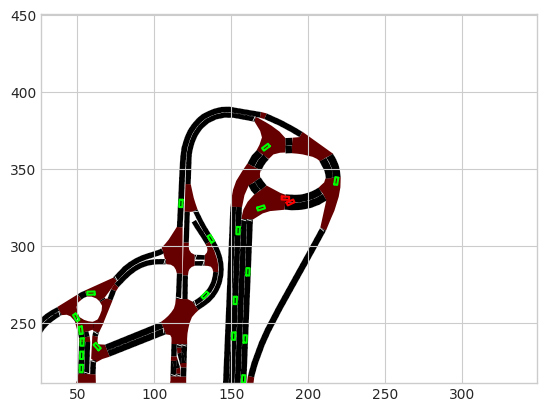

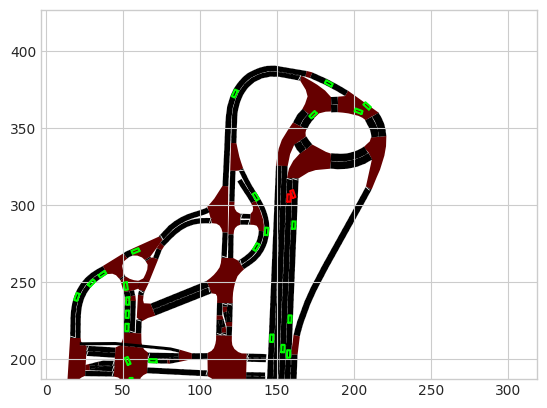

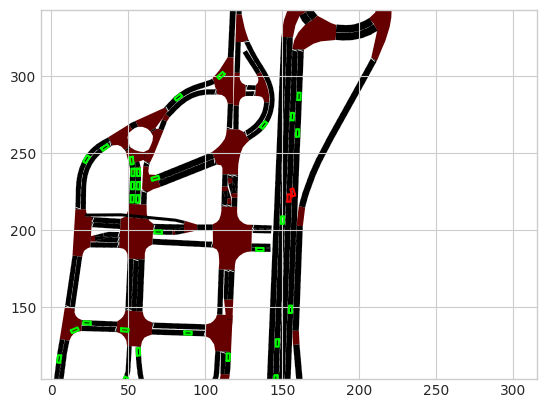

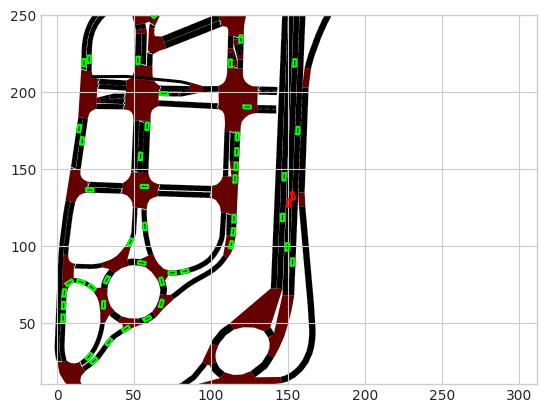

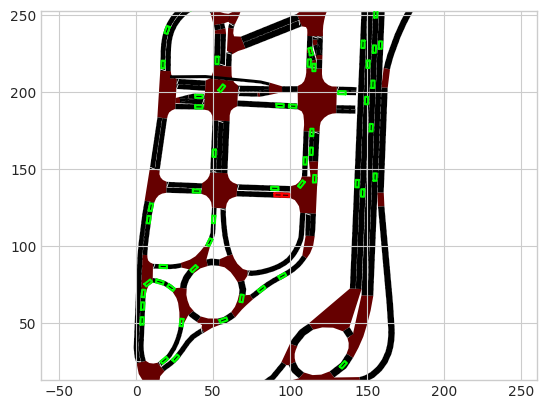

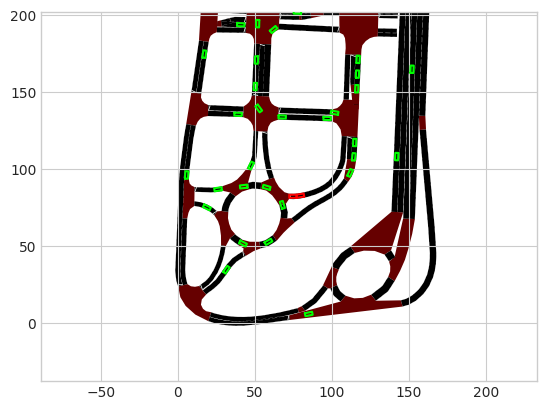

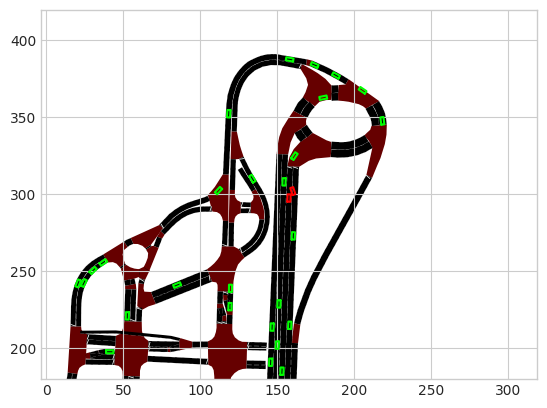

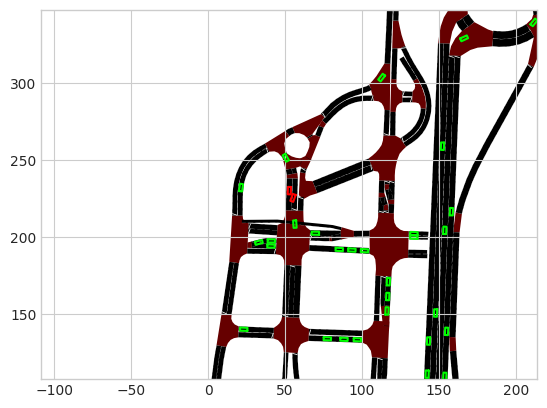

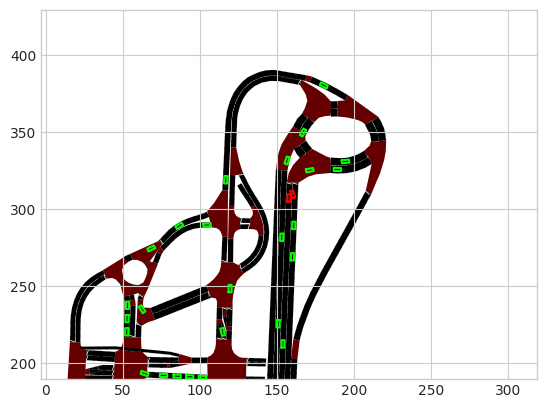

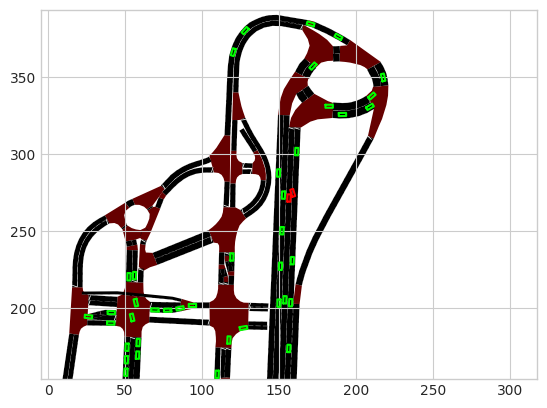

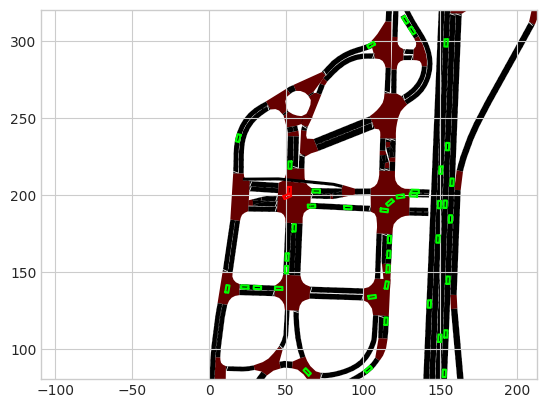

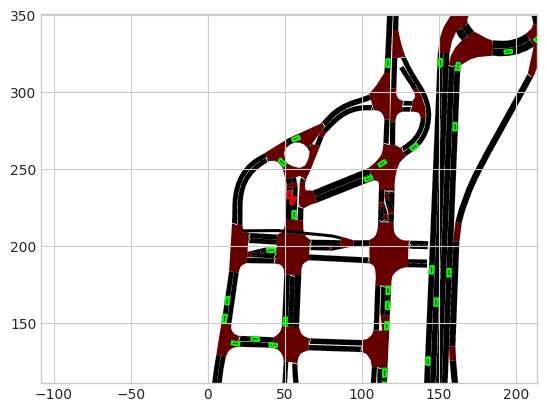

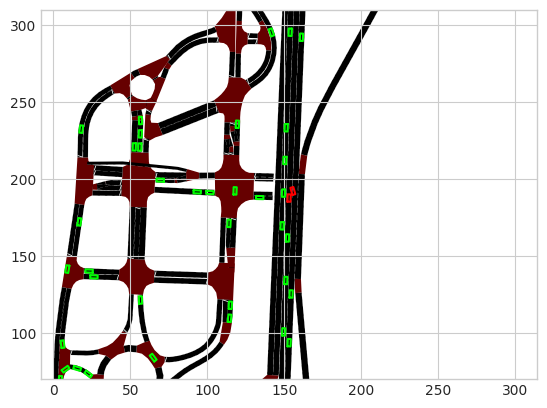

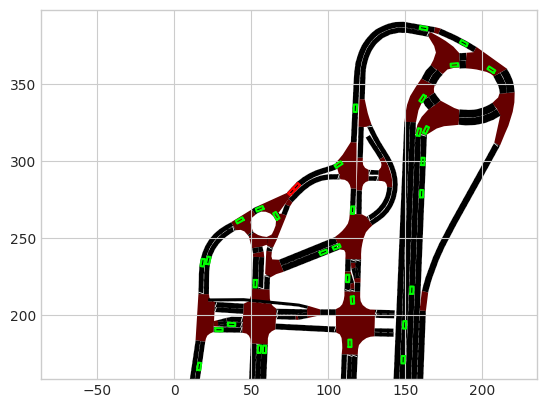

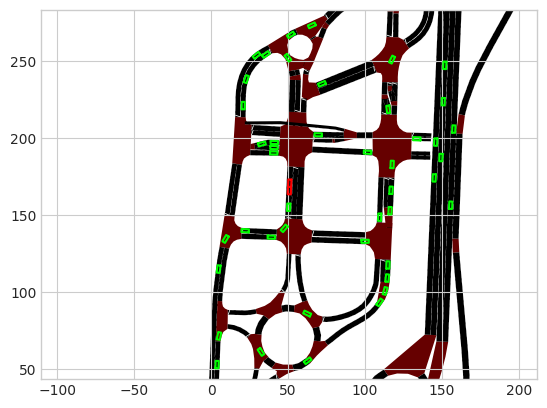

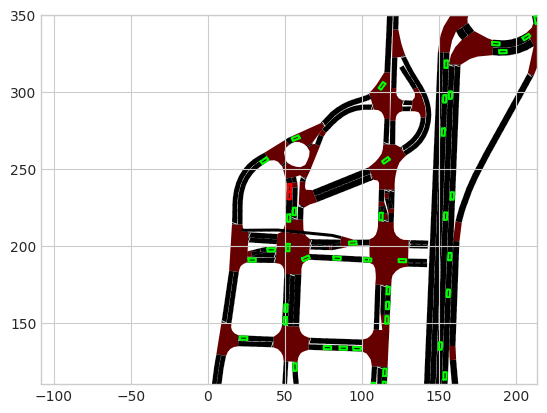

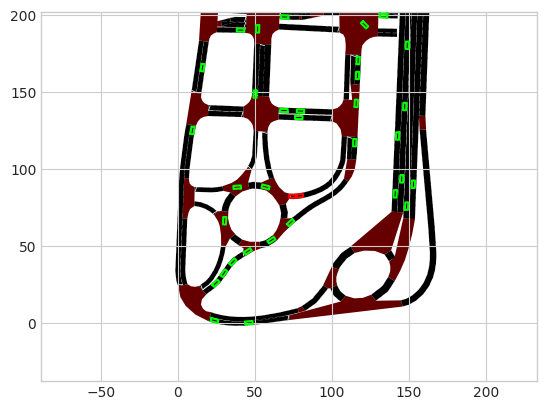

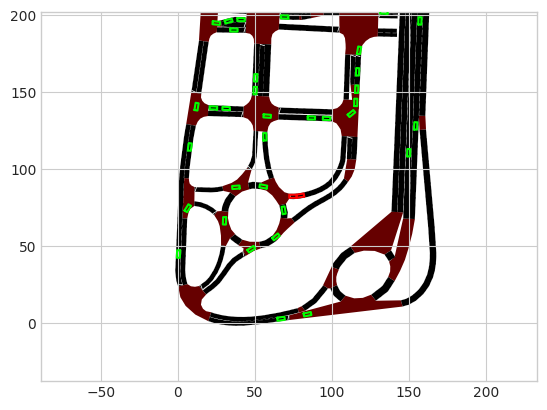

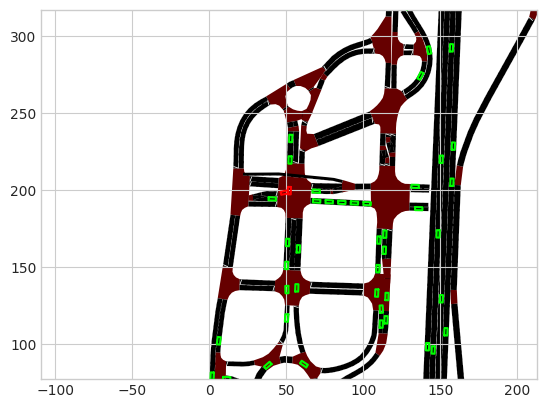

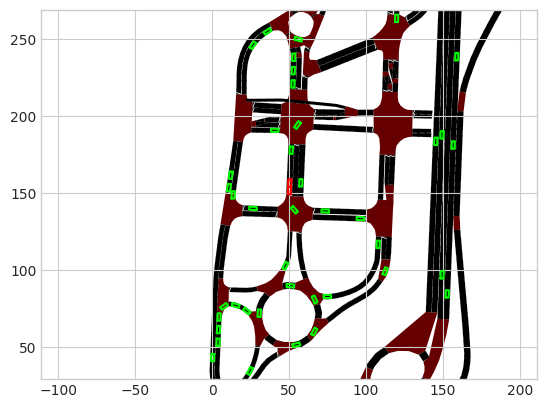

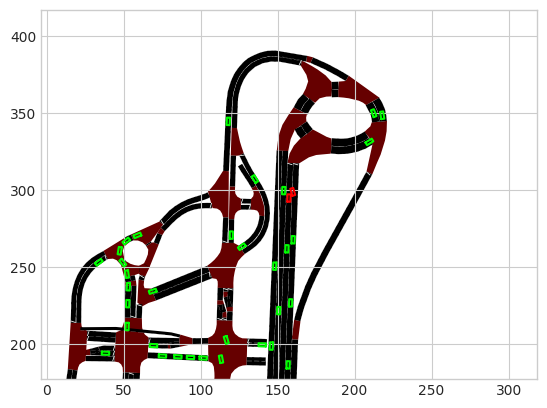

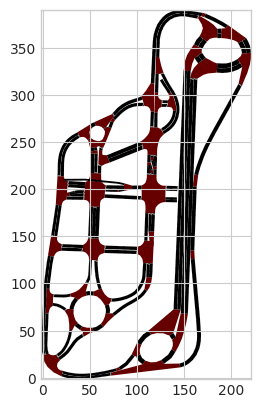

In [53]:
# 生成三个文件夹: simple(typical) non-negligence-caused negligence-caused 
export_path = f"{exp_repo}/{mode}/{user}/videos"
file_name = f"{export_stat_dir}/check_list.txt"

# quick check
# export_videos(f"{export_path}/quick_check", "check.txt")

# export_videos(f"{export_path}/non_neg_check", non_neg_check_list_path)
export_videos(f"{export_path}/neg_caused_check", neg_caused_check_list_path)

### See README-viz.md for visualization

In [48]:
exp_stats_info[(exp_stats_info["location"] == "roundabout") & (exp_stats_info["lane_id"] == ":NODE_21_0_0") & (exp_stats_info["neg_info"] == "roundabout_neglect_conflict_lead")]["name"].values

array([], dtype=object)

In [49]:
exp_stats_info[(exp_stats_info["location"] == "roundabout")]["lane_id"].unique()

array(['EG_34_1_24_1', ':nd_34_1_6_1_0', ':NODE_14_1_0', ':NODE_6_0_0',
       ':NODE_22_2_0', 'EG_34_1_16_0', ':nd_34_1_6_0_0', 'EG_34_1_3_0',
       'EG_34_1_3_1', ':NODE_5_1_1', ':NODE_22_1_0', 'EG_21_1_1_0',
       ':NODE_29_0_1', ':NODE_29_0_0', 'EG_10_1_1_0', 'EG_1_1_1_0',
       'EG_16_23_1_1', 'EG_9_1_1_0', 'EG_34_1_24_0', 'EG_16_23_1_0',
       'EG_19_1_1_0', ':NODE_5_1_0', ':NODE_21_0_0', 'EG_22_1_1_0',
       ':NODE_21_1_0', ':NODE_14_2_0', 'EG_20_1_1_0', 'EG_34_1_16_1',
       ':NODE_20_0_0', ':nd_34_1_6_1_1', ':NODE_31_1_0', ':NODE_16_1_0',
       ':NODE_13_1_0', ':nd_15_1_2_0_0', 'EG_23_2_1_0', ':NODE_13_0_0',
       ':NODE_22_3_0', ':NODE_19_2_0', 'EG_1_1_1_1', ':nd_34_1_6_0_1',
       ':NODE_6_2_0', ':NODE_7_0_1', 'EG_21_1_14_0', ':NODE_6_0_1',
       'EG_15_1_17_0', ':NODE_20_3_0', 'EG_34_1_6_0', 'EG_21_1_5_0',
       'EG_16_45_1_1', 'EG_20_1_11_0', 'EG_15_1_1_0'], dtype=object)